In [2]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
from google.colab import files
uploaded = files.upload()
import io
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (1).csv


In [4]:
from google.colab import files
uploaded = files.upload()
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test.csv


In [57]:
train = pd.DataFrame(train)
test  = pd.DataFrame(test)
print("Training Size is :",train.shape)
print("Testing Size is  :",test.shape)
train.columns = [i.lower() for i in train.columns]
test.columns = [i.lower() for i in test.columns]

Training Size is : (8523, 12)
Testing Size is  : (5681, 11)


# let's analyze train and test set's parallely

In [6]:
train.describe()  # for numeric columns only

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test.describe() # for numeric columns only

,item_weight,item_visibility,item_mrp,outlet_establishment_year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


### observation : column item_weight as missing values in both train and test set's




In [8]:
train[train.select_dtypes('object').columns].describe().T #for columns of type object (categorical column)

,count,unique,top,freq
item_identifier,8523,1559,FDW13,10
item_fat_content,8523,5,Low Fat,5089
item_type,8523,16,Fruits and Vegetables,1232
outlet_identifier,8523,10,OUT027,935
outlet_size,6113,3,Medium,2793
outlet_location_type,8523,3,Tier 3,3350
outlet_type,8523,4,Supermarket Type1,5577


In [9]:
test[test.select_dtypes('object').columns].describe().T #for columns of type object (categorical column)

,count,unique,top,freq
item_identifier,5681,1543,FDW10,8
item_fat_content,5681,5,Low Fat,3396
item_type,5681,16,Snack Foods,789
outlet_identifier,5681,10,OUT027,624
outlet_size,4075,3,Medium,1862
outlet_location_type,5681,3,Tier 3,2233
outlet_type,5681,4,Supermarket Type1,3717


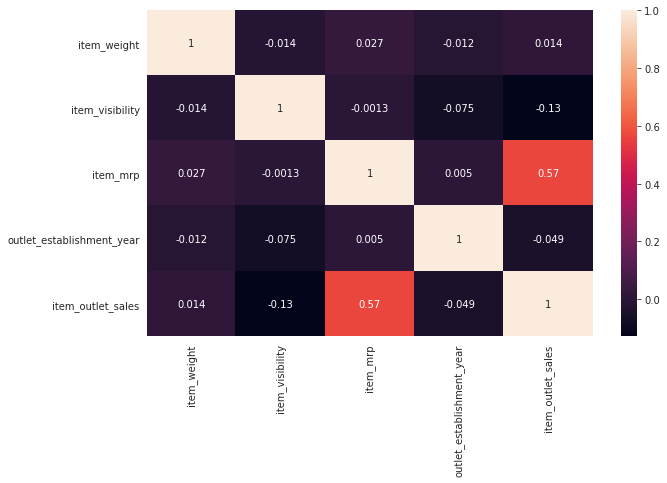

In [58]:
sns.heatmap(train.corr(),annot = True)

### observation : column Outlet_Size as missing values both in train and test set's

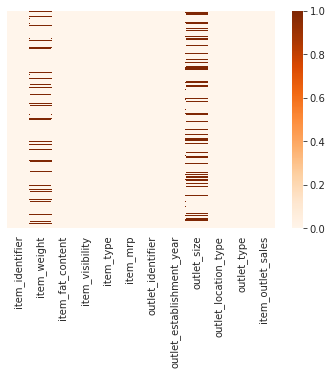

In [10]:
# let's see columns with missing values visually with the help of heatmap
sns.heatmap(train.isnull(),yticklabels =False ,cmap = "Oranges")

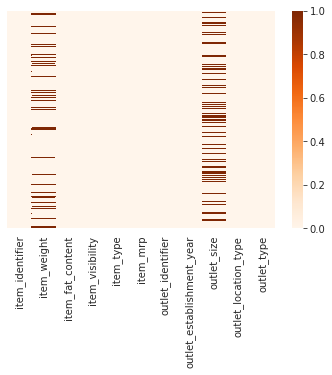

In [11]:
# let's see columns with missing values visually with the help of heatmap
sns.heatmap(test.isnull(),yticklabels =False ,cmap = "Oranges")

In [12]:
# let's analyze each columns visually
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Number of Unique values in item_identifier column is  : 1559


Text(0.5, 0, 'item Number')

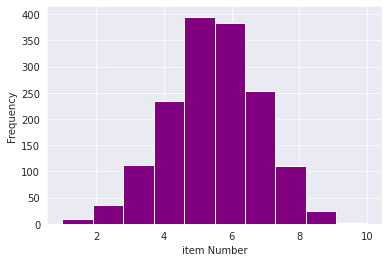

In [13]:
print("Number of Unique values in item_identifier column is  :",train.item_identifier.nunique())
train.item_identifier.value_counts().plot(kind = 'hist',color = 'purple') 
plt.xlabel('item Number')

Number of Unique values in item_identifier column is  : 1543


Text(0.5, 0, 'item Number')

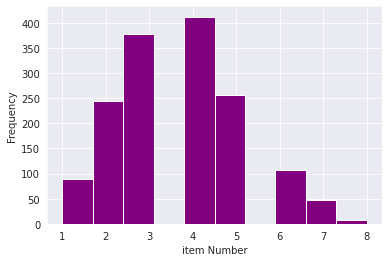

In [14]:
print("Number of Unique values in item_identifier column is  :",test.item_identifier.nunique())
test.item_identifier.value_counts().plot(kind = 'hist',color = 'purple') 
plt.xlabel('item Number')

Minimum sale is : 33.29
Maximum sale is : 13086.9648
Number of Unique values in item_identifier column is  : 3493


Text(0.5, 1.0, 'outlet_sales representation:')

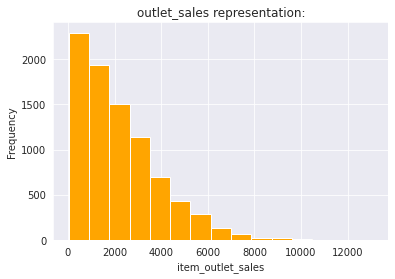

In [15]:
print("Minimum sale is :",train.item_outlet_sales.min())
print("Maximum sale is :",train.item_outlet_sales.max())
print("Number of Unique values in item_identifier column is  :",train.item_outlet_sales.nunique())
train.item_outlet_sales.plot(kind = 'hist',bins  = 15,color ="orange") 
plt.xlabel('item_outlet_sales')
plt.title("outlet_sales representation:")


In [16]:
# let's combine both train and test set's
df = pd.concat([train,test],axis = 0)
print("Entire DataFrame shape : ",df.shape)

Entire DataFrame shape :  (14204, 12)


##  univariate analysis

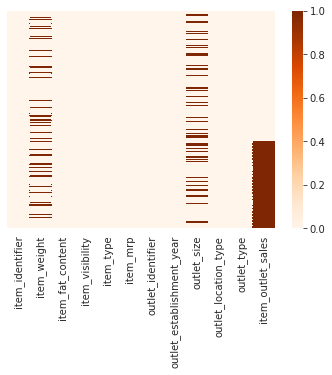

In [17]:
# let's see columns with missing values visually with the help of heatmap
sns.heatmap(df.isnull(),yticklabels =False ,cmap = "Oranges")

Minimum sale is : 33.29
Maximum sale is : 13086.9648


Text(0.5, 1.0, 'outlet_sales representation:')

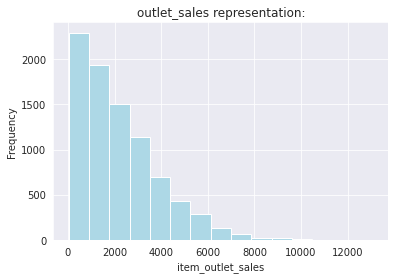

In [18]:
print("Minimum sale is :",df.item_outlet_sales.min())
print("Maximum sale is :",df.item_outlet_sales.max())
df.item_outlet_sales.plot(kind = 'hist',bins  = 15,color ="lightblue") 
plt.xlabel('item_outlet_sales')
plt.title("outlet_sales representation:")

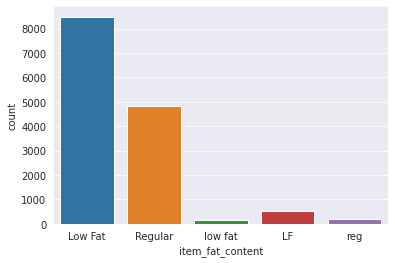

In [19]:
sns.countplot(df.item_fat_content)
# observation : low fat contents items are sold more than any other items

Text(0.5, 1.0, 'Different items and  its sold  count ')

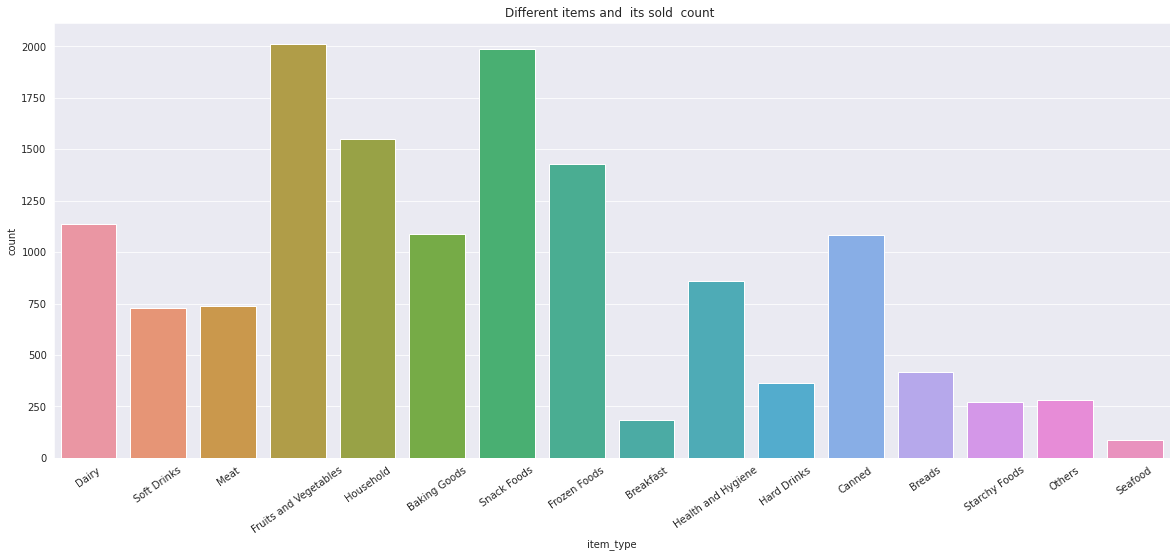

In [20]:
plt.rcParams['figure.figsize'] = (20,8)
plt.title("Different items and  its sold  count ")
plt.xticks(rotation = 35)
sns.countplot(df.item_type)
plt.title("Different items and  its sold  count ")
# observation : Fruits and Vegetables, Snack foods are the most sold items and Sea food is the least freaquently sold item

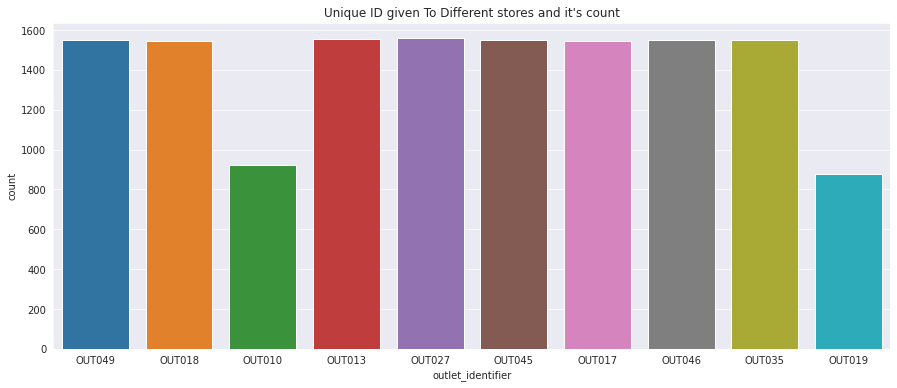

In [21]:
plt.rcParams['figure.figsize'] = (15,6)
plt.title("Unique ID given To Different stores and it's count")
sns.countplot(df.outlet_identifier)
# observation : outlet's other than out010 and out019 as many hotspots (might be in different locations)  

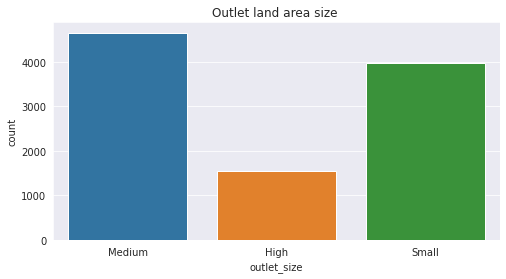

In [22]:
plt.rcParams['figure.figsize'] = (8,4)
plt.title("Outlet land area size ")
sns.countplot(df.outlet_size)
#observation : most of the stores as Medium land area size and only few has large area size

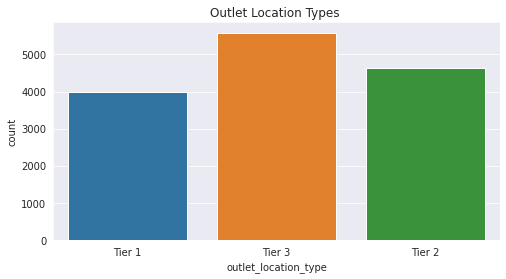

In [23]:
plt.rcParams['figure.figsize'] = (8,4)
plt.title("Outlet Location Types ")
sns.countplot(df.outlet_location_type) #outlet_location_type vs output

#Standard of Living : tier1 ,eg : Bangalore > tier 2  ,eg : Agra > tier 3 : cities under developed.

#interms of outlet_location_type  : Tier3 > Tier2 >Tier1 ,
# Tier3 got highest counts ,it may be because of more number small grocery shops in tier 3 cities,
# Tier1 got least counts comapred to tier2 and tier3 ,it may be because of More number of supermarkets are present  in developed cities ,so people tend to
#....go to supermarkets where they can find all of the items rather than visiting small grocery.
 

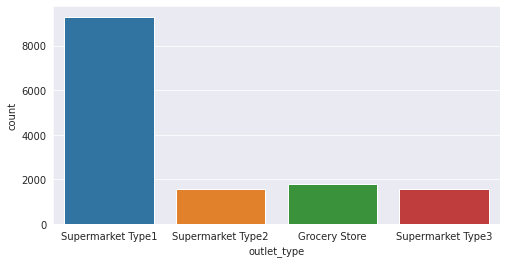

In [24]:
plt.rcParams['figure.figsize'] = (8,4)
sns.countplot(df.outlet_type)
#obervation : most of the stores are of type1 Supermarket ,"Might be good one comaparbly" 

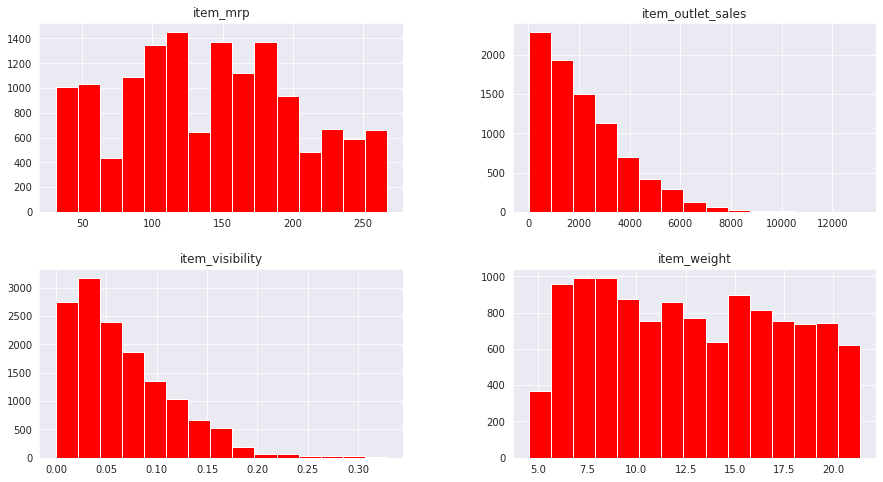

In [25]:
df_his = df.drop('outlet_establishment_year',axis = 1)
plt.rcParams[('figure.figsize')] = (15,8)
df[df_his.columns].hist(bins =15,color= "red")
plt.show()

# Bivariate analysis

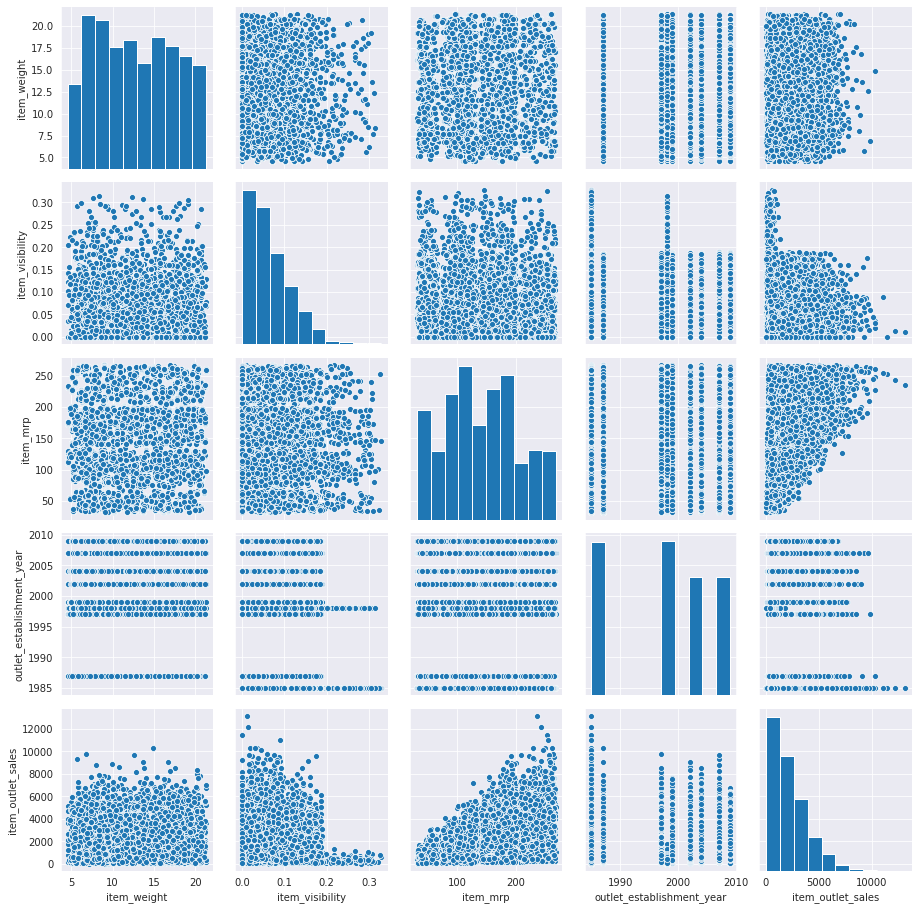

In [26]:
plt.rcParams[('figure.figsize')] = (20,15)
sns.pairplot(df)

In [27]:
# let's see how   fat_content  affects outlet_sales
mean_fat_content_sale_price = df.pivot_table(index = "item_fat_content",values= "item_outlet_sales" ,aggfunc ='mean' )
mean_fat_content_sale_price

,item_outlet_sales
item_fat_content,
LF,2073.551928
Low Fat,2164.477336
Regular,2235.186702
low fat,2087.740737
reg,1962.192268


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

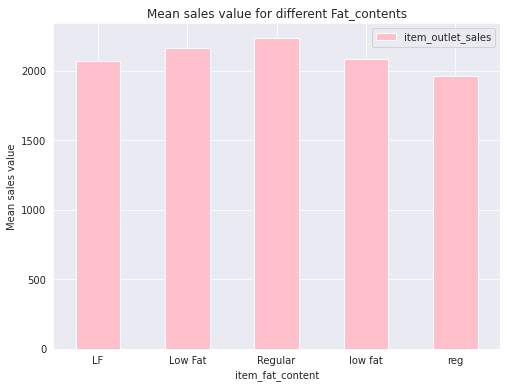

In [28]:
plt.rcParams['figure.figsize'] = (8,6)
mean_fat_content_sale_price.plot(kind = 'bar',color = 'pink')
plt.title("Mean sales value for different Fat_contents")
plt.ylabel("Mean sales value")
plt.xticks(rotation = 360)

In [29]:
out_loc_sales = df.pivot_table(index = "outlet_location_type",values = "item_outlet_sales",aggfunc = "mean")
out_loc_sales

,item_outlet_sales
outlet_location_type,
Tier 1,1876.909159
Tier 2,2323.990559
Tier 3,2279.627651


Text(0, 0.5, 'outlet sales ')

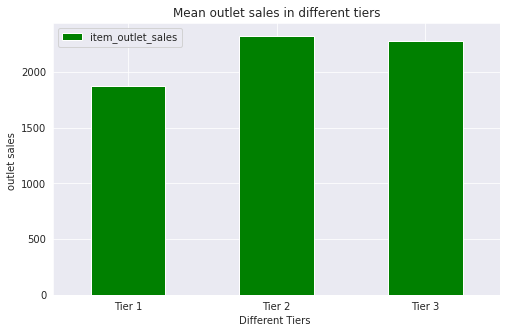

In [30]:
# Tier1 got least mean sales value comapred to tier2 and tier3 ,it may be because of More number of supermarkets are present  in developed cities ,so people tend to
#....go to supermarkets where they can find all of the items instead of visiting small grocery.
plt.rcParams["figure.figsize"] = (8,5)
out_loc_sales.plot(kind = 'bar',color = "green")
plt.xticks(rotation = 360)
plt.title("Mean outlet sales in different tiers")
plt.xlabel("Different Tiers ")
plt.ylabel("outlet sales ")

In [31]:
out_type_vs_sales = df.pivot_table(index = "outlet_type",values = "item_outlet_sales",aggfunc = "mean")
out_type_vs_sales

,item_outlet_sales
outlet_type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


Text(0.5, 0, 'mean outlet sales ')

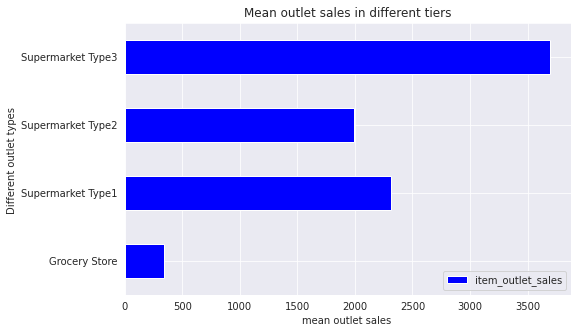

In [32]:
plt.rcParams["figure.figsize"] = (8,5)
out_type_vs_sales.plot(kind = 'barh',color = "blue")
plt.title("Mean outlet sales in different tiers")
plt.ylabel("Different outlet types ")
plt.xlabel("mean outlet sales ")

In [33]:
# let's analyze outlet_sales  year wise 
outlet_sales_year_wise = df.pivot_table(index = 'outlet_establishment_year',values = "item_outlet_sales",aggfunc = "mean" )
outlet_sales_year_wise
#observation : 
# year 1985 and 2004 got highest sales 
# year 1998 got lowest sales 

,item_outlet_sales
outlet_establishment_year,
1985,2483.677474
1987,2298.995256
1997,2277.844267
1998,339.351662
1999,2348.354635
2002,2192.384798
2004,2438.841866
2007,2340.675263
2009,1995.498739


Text(0, 0.5, 'Mean sales ')

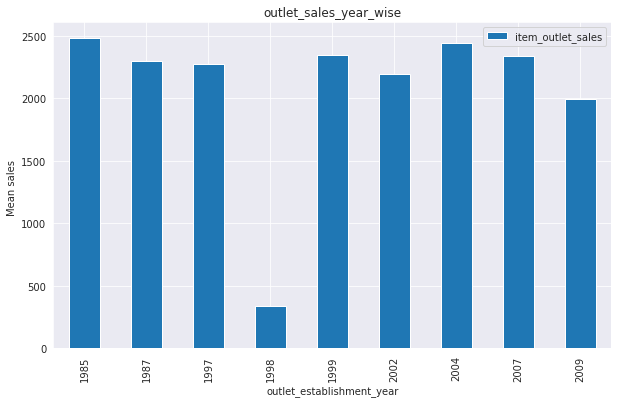

In [34]:
plt.rcParams['figure.figsize'] = (10,6)
outlet_sales_year_wise.plot(kind = 'bar')
plt.title("outlet_sales_year_wise")
plt.ylabel("Mean sales ")

# Now lets treat missing values 

In [35]:
print("Columns with thier missing values percentage : ")
print("="*35)
df.isnull().mean()*100

Columns with thier missing values percentage : 


item_identifier               0.000000
item_weight                  17.171219
item_fat_content              0.000000
item_visibility               0.000000
item_type                     0.000000
item_mrp                      0.000000
outlet_identifier             0.000000
outlet_establishment_year     0.000000
outlet_size                  28.273726
outlet_location_type          0.000000
outlet_type                   0.000000
item_outlet_sales            39.995776
dtype: float64

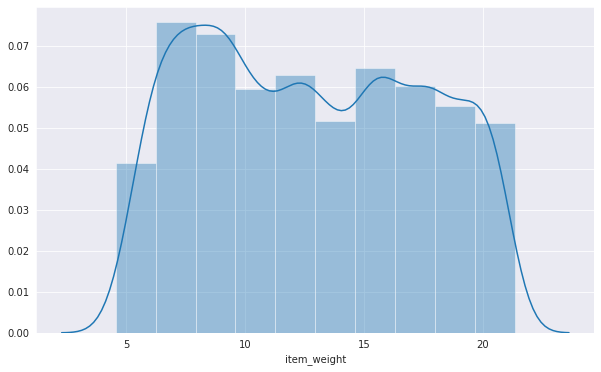

In [36]:
#let's impute  item_weight column
# assuming column item_weight  is of the form normal distribution (gaussian dist),
#...therefore we'll replace Nan values with mean of item_weight columns
sns.distplot(df["item_weight"],bins = 10)

In [37]:
print("Mean of Item_weight column is : ",df.item_weight.mean())
df.item_weight.fillna(df.item_weight.mean(),inplace = True)

Mean of Item_weight column is :  12.792854228644991


In [38]:
#let's treat missin values of  outlet_type column
print("frequent value in outlet_type column is :",df.outlet_type.mode()[0])
df.outlet_type.fillna(df.outlet_type.mode()[0],inplace =True)

frequent value in outlet_type column is : Supermarket Type1


In [39]:
#let's treat missin values of  outlet_size column
print("frequent value in outlet_type column is :",df.outlet_size.mode()[0])
df.outlet_size.fillna(df.outlet_size.mode()[0],inplace =True)

frequent value in outlet_type column is : Medium


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            14204 non-null  object 
 1   item_weight                14204 non-null  float64
 2   item_fat_content           14204 non-null  object 
 3   item_visibility            14204 non-null  float64
 4   item_type                  14204 non-null  object 
 5   item_mrp                   14204 non-null  float64
 6   outlet_identifier          14204 non-null  object 
 7   outlet_establishment_year  14204 non-null  int64  
 8   outlet_size                14204 non-null  object 
 9   outlet_location_type       14204 non-null  object 
 10  outlet_type                14204 non-null  object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.7+ MB


In [0]:
res = []
for i in df["item_identifier"]:
    res.append(i[0])

In [0]:
 df["item_id"] = pd.Series(res) 
 df.drop(["item_identifier"],axis = 1,inplace = True )

In [43]:
df

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_id
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,F
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,D
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,F
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,F
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,N
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,F
5677,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,F
5678,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,F
5679,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,F


In [44]:
res = []
for i in df["outlet_identifier"]:
    res.append(i[3:])

df["outlet_id"] = pd.Series(res) 
df.drop(["outlet_identifier"],axis = 1,inplace = True )   
print(df.outlet_id.value_counts())

045    1578
046    1564
035    1563
013    1562
027    1559
017    1542
018    1533
049    1533
010     922
019     848
Name: outlet_id, dtype: int64


In [45]:
df.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_id,outlet_id
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,F,049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,D,018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,F,049
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,F,010
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,N,013


In [0]:
df["item_outlet_sales"] =df.item_outlet_sales.replace(np.NaN,0)

In [0]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [48]:
df.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_id,outlet_id
0,284,1,1097,4,7567,4,1,0,1,2541,1,9
1,57,2,1436,14,632,8,1,2,2,423,0,3
2,376,1,1172,10,3897,4,1,0,1,1640,1,9
3,393,2,0,6,5626,3,1,2,0,671,1,0
4,265,1,0,9,848,1,0,2,1,866,2,1


In [49]:
#encoding using get dummies function
ex = df.copy()
dummies = pd.get_dummies(data = df,columns = ["item_id","outlet_id","item_type","item_fat_content"],drop_first = True,prefix = "new")
dummies.shape

(14204, 38)

In [75]:
# let's split train and test data
#Training Size is : (8523, 12)
#Testing Size is  : (5681, 11)
train = dummies.iloc[0:8523,:]
test  =  dummies.iloc[8523:,:]
print("Training Size is :",train.shape)
print("Testing Size is  :",test.shape)

Training Size is : (8523, 38)
Testing Size is  : (5681, 38)


In [76]:
from sklearn.metrics import mean_squared_error,r2_score
#from sklearn.model_selection import train_test_split
test.drop(["item_outlet_sales"],axis = 1,inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [77]:
test

,item_weight,item_visibility,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,new_1,new_2,new_1,new_2,new_3,new_4,new_5,new_6,new_7,new_8,new_9,new_1,new_2,new_3,new_4,new_5,new_6,new_7,new_8,new_9,new_10,new_11,new_12,new_13,new_14,new_15,new_1,new_2,new_3,new_4
0,409,163,2699,4,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,226,4289,1814,7,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,343,9904,7363,3,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,158,988,4499,7,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,324,10826,7166,0,1,2,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,298,718,3881,2,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5677,180,11820,5069,8,1,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5678,293,8009,3196,5,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5679,354,0,6626,7,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# we only analyze for train set

# Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train.drop(["item_outlet_sales"],axis = 1),train["item_outlet_sales"])
ypred = lr.predict(train.drop(["item_outlet_sales"],axis = 1))
print("r2_score  :",r2_score(train["item_outlet_sales"],ypred))
print("MSE :",mean_squared_error(train["item_outlet_sales"],ypred))
print("rmse :",mean_squared_error(train["item_outlet_sales"],ypred)**0.5)

r2_score  : 0.6352362218572328
MSE : 307537.75373500696
rmse : 554.5608656721163


# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(train.drop(["item_outlet_sales"],axis = 1),train["item_outlet_sales"])
ypred = dt.predict(train.drop(["item_outlet_sales"],axis = 1))
print("r2_score  :",r2_score(train["item_outlet_sales"],ypred))
print("MSE :",mean_squared_error(train["item_outlet_sales"],ypred))
print("rmse :",mean_squared_error(train["item_outlet_sales"],ypred)**0.5)
# overfitting__________________________________!!!!!!

r2_score  : 1.0
MSE : 0.0
rmse : 0.0


In [87]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30)
rf.fit(train.drop(["item_outlet_sales"],axis = 1),train["item_outlet_sales"])
ypred = rf.predict(train.drop(["item_outlet_sales"],axis = 1))
print("r2_score  :",r2_score(train["item_outlet_sales"],ypred))
print("MSE :",mean_squared_error(train["item_outlet_sales"],ypred))
print("rmse :",mean_squared_error(train["item_outlet_sales"],ypred)**0.5)

r2_score  : 0.9435590267929128
MSE : 47586.22198482537
rmse : 218.142664292947


### out of LinearRegression,DecisionTree,and RandomForest .
### RandomForest giving best r2_score 0.9 and which is pretty good result.